# Biking Analysis - June 2020

## 1. Introduction

Below I will do an analysis on statistics from all of my bikes rides for the month of June 2020. Tracking of the data was handled thanks to a handy Under Armour app. For future months, I will use this data for comparison.  

## 2. Reading in data

In [45]:
#Import library
import pandas as pd

#Read in .csv file of data
data = pd.read_csv('Downloads/Biking Stats - June - Sheet1.csv')

print(data)

          Date  Distance(miles)  Time(minutes)  Average Speed (mph)
0   06-01-2020             9.85             56                 10.4
1   06-02-2020             5.47             31                 10.3
2   06-03-2020             5.42             31                 10.4
3   06-06-2020            10.86             65                  9.3
4   06-09-2020             7.68             43                 10.5
5   06-10-2020             5.52             31                 10.5
6   06-13-2020             6.28             35                 10.5
7   06-16-2020             5.44             30                 10.6
8   06-19-2020             5.53             30                 11.0
9   06-21-2020             5.06             28                 10.8
10  06-22-2020             5.48             33                  9.9
11  06-24-2020             6.83             47                  8.7
12  06-27-2020            15.50             95                  9.8


## 3. Time and Distance

Now with the data in our hands, let's take a quick look at the Time and Distance columns. Here I am going to sort the Time column and graph it against the distance so we can visualize all of the rides.

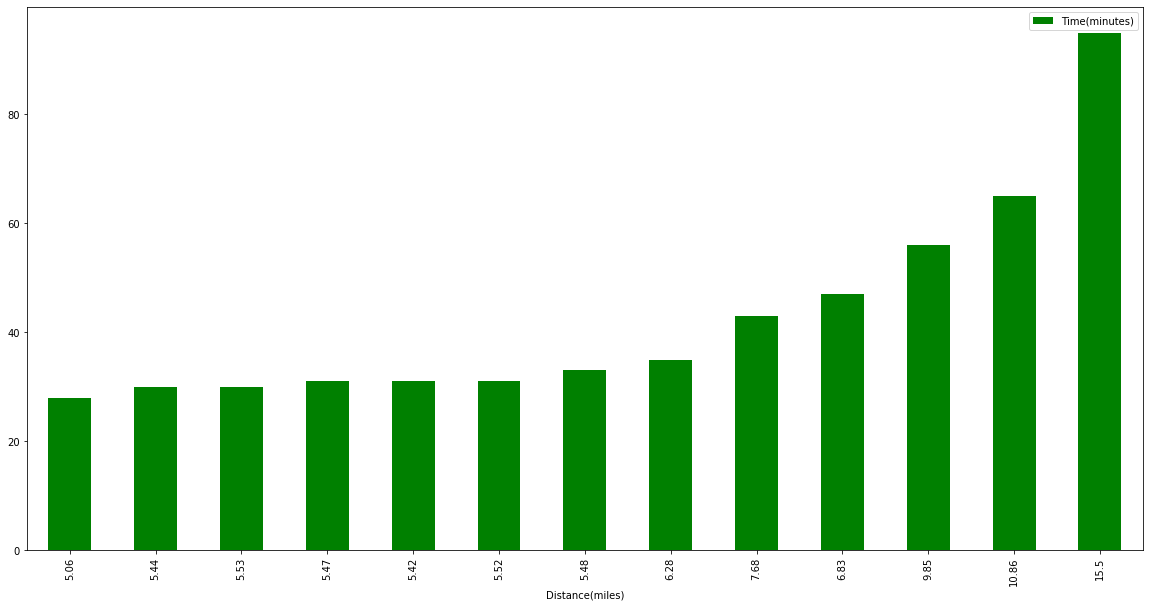

In [5]:
#Import
from pandas import DataFrame
from pylab import rcParams

#Create bar graph of Time against Distance
df = DataFrame(data, columns=['Time(minutes)', 'Distance(miles)'])

#Sort values by the Time column
df.sort_values(by='Time(minutes)', inplace=True)
df.set_index('Distance(miles)')

#Set size parameters and plot
rcParams['figure.figsize'] = 20, 10
df.plot(x = 'Distance(miles)', y = 'Time(minutes)', kind='bar', color='green')

And we can run some basic statistical measures on both of the columns as well.

In [6]:
#Helper method
def printStats (d):
    print('Average: ', d.mean())
    print('Median: ', d.median())
    print('Standard Deviation: ', d.std())
    print('Variance: ', d.var())
    
#Print time stats
print('TIME STATISTICS (in minutes): ')
printStats(data['Time(minutes)'])
print("\n")

#Print distance stats
print('DISTANCE STATISTICS (in miles): ')
printStats(data['Distance(miles)'])

TIME STATISTICS (in minutes): 
Average:  42.69230769230769
Median:  33.0
Standard Deviation:  19.431008789152006
Variance:  377.56410256410254


DISTANCE STATISTICS (in miles): 
Average:  7.3015384615384615
Median:  5.53
Standard Deviation:  3.0658871640300305
Variance:  9.399664102564103


(Note that the high variance for Time here makes sense due to the data points being spread out pretty well from 28-95.)

## 4. Average Speed per Distance

Here we'll take a look at the average speed column. In travelling further distances, I would think that the average speed would be lower as we are utilizing more stamina across the whole ride. Whereas with a shorter ride, you can bike at a faster speed for a shorter distance. Let's pair these two columns against each other and see if that theory will hold true.

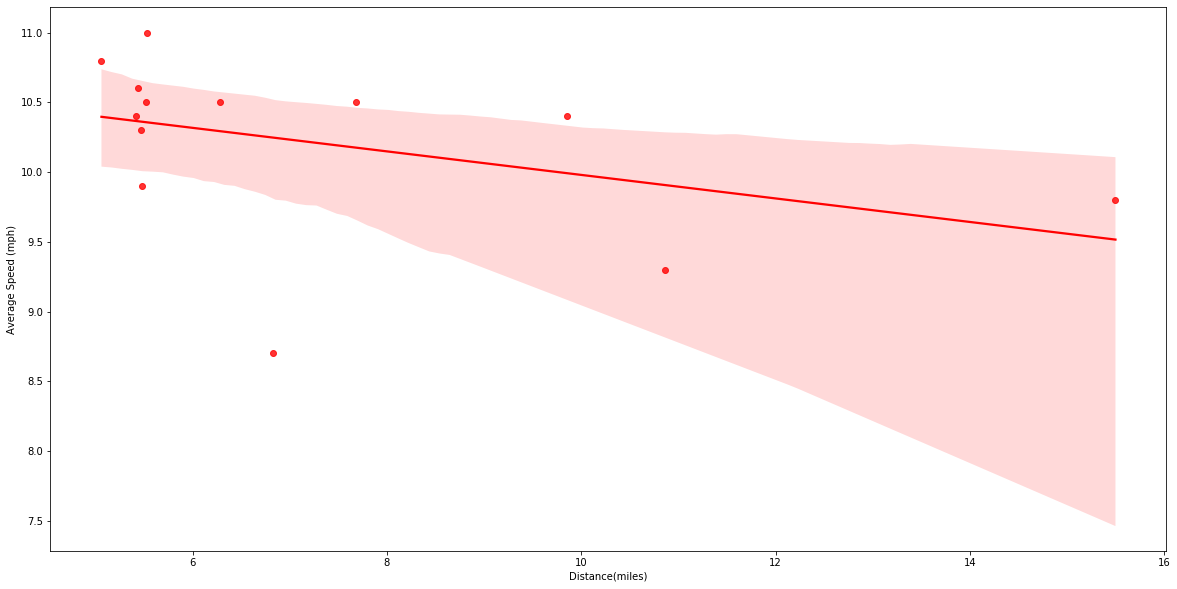

In [24]:
#Import library
import seaborn as sns

#Create scatterplot using seaborn
sns.regplot(data['Distance(miles)'], data['Average Speed (mph)'], color='red')

And for the most part we can see the assumption holds true--save for a few outliers like average speed ~8.6 for a 7 mile bike ride or average speed ~10 for a 15 mile bike ride. We can definitely observe the slight downward trend as more miles are added on. Let's take some simple statistical measures on the total average speed.

In [27]:
print("COMIBNED AVERAGE SPEED STATS TAKEN FROM EACH RIDE: ")
printStats(data['Average Speed (mph)'])

COMIBNED AVERAGE SPEED STATS TAKEN FROM EACH RIDE: 
Average:  10.207692307692309
Median:  10.4
Standard Deviation:  0.6343783551130173
Variance:  0.4024358974358975


## 5. One Last Overview

For the last section I will graph all of the columns against their respective dates for an ultimate visual of the rides. Let's take a look:

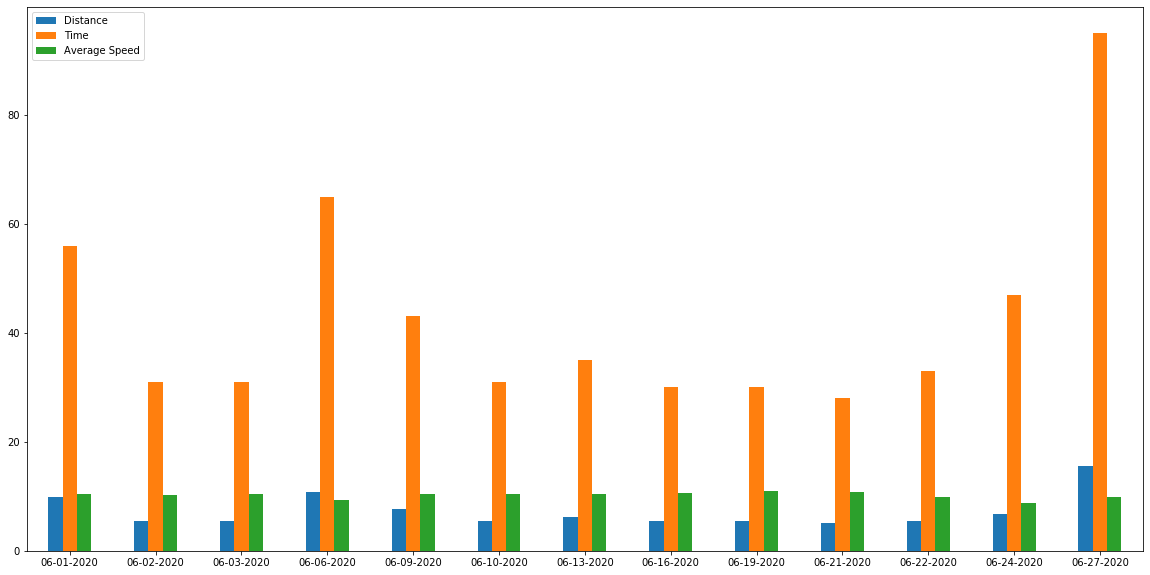

In [50]:
#Set parameters
index = data['Date'].values
distance = data['Distance(miles)'].values
time = data['Time(minutes)'].values
avgspeed = data['Average Speed (mph)'].values

#Create dataframe and plot bar graph
df3 = DataFrame({"Distance": distance, "Time": time, "Average Speed": avgspeed}, index=index)
df3.plot.bar(rot=0)

From this final graph, we can see that the average speed doesn't change much at all throughout all of the dates. This is also noted with the low variance of the total average speed shown in the previous section. The time of the rides definitely changes the most (some days call for nicer bike rides than others!) and the distance travelled usually seems to follow a dependent relationship on the time (both increase and decrease together). 